In [ ]:
!pip install accelerate


In [1]:
# load the dataset
import pandas as pd

# Specify the path to your JSON file
json_file_path = '/home/ubuntu/python_perf.jsonl'
#file_test = '/home/ubuntu/data/test.jsonl'
# Read the JSON file into a Pandas DataFrame
df= pd.read_json(json_file_path, lines = True)

#df_test = pd.read_json(file_test,lines=True)
print(df.head())

                                          commit_url  \
0  https://github.com/0xRose/Rose-Stealer_old/com...   
1  https://github.com/1200wd/bitcoinlib/commit/72...   
2  https://github.com/1200wd/bitcoinlib/commit/41...   
3  https://github.com/1313e/CMasher/commit/0de417...   
4  https://github.com/1313e/CMasher/commit/d6573c...   

                                      commit_message    filename  \
0  refactor: replace multiple `==` checks with `i...     main.py   
1  [ref] update wallets txs more efficient when s...  wallets.py   
2  [ref] improve tx size and fee estimate in swee...  wallets.py   
3  heavily optimized the algorithm for calculatin...    utils.py   
4  enh: slightly improve startup time by raising ...    utils.py   

                 commit_date  nloc  n_added_lines  n_deleted_lines  \
0  2023-03-21 18:59:16+00:00   713              1                1   
1  2020-02-19 11:04:57+01:00  2257              9                9   
2  2022-01-01 20:03:26+01:00  2476          

In [2]:
def extract_diff_before(row):
    # Extracting start and end line numbers from loc_before
    loc_range = row['loc_before'][1:-1].split(':')  # Remove brackets and split
    start, end = int(loc_range[0]), int(loc_range[1])
    # Splitting the src_before by lines and extracting the relevant lines
    src_lines = row['src_before'].split('\n')
    diff_before = '\n'.join(src_lines[start-1:end])  # Adjust for zero-based indexing
    return diff_before
# Apply the function to create the diff_before column
df['diff_before'] = df.apply(extract_diff_before, axis=1)
print(df['diff_before'][0])



def DecryptValue(buff, master_key=None):
    starts = buff.decode(encoding="utf8", errors="ignore")[:3]
    if starts == "v10" or starts == "v11":
        iv = buff[3:15]
        payload = buff[15:]
        cipher = AES.new(master_key, AES.MODE_GCM, iv)
        decrypted_pass = cipher.decrypt(payload)
        decrypted_pass = decrypted_pass[:-16].decode()
        return decrypted_pass


In [4]:
def extract_diff_after(row):
    # Extracting start and end line numbers from loc_after
    loc_range = row['loc_after'][1:-1].split(':')  # Remove brackets and split
    start, end = int(loc_range[0]), int(loc_range[1])
    # Splitting the src_after by lines and extracting the relevant lines
    src_lines = row['src_after'].split('\n')
    diff_after = '\n'.join(src_lines[start-1:end])  # Adjust for zero-based indexing
    return diff_after
# Apply the function to create the diff_after column
df['diff_after'] = df.apply(extract_diff_after, axis=1)
print(df['diff_after'][0],df['commit_message'][0])

def DecryptValue(buff, master_key=None):
    starts = buff.decode(encoding="utf8", errors="ignore")[:3]
    if starts in ("v10", "v11"):
        iv = buff[3:15]
        payload = buff[15:]
        cipher = AES.new(master_key, AES.MODE_GCM, iv)
        decrypted_pass = cipher.decrypt(payload)
        decrypted_pass = decrypted_pass[:-16].decode()
        return decrypted_pass refactor: replace multiple `==` checks with `in`  to check if a variable is equal to one of many values, combine the values into a tuple and check if the variable is contained `in` it instead of checking for equality against each of the values. this is faster, less verbose, and more readable.


In [6]:
sampled_df = df.sample(10)

In [7]:
# from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
# from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
# from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline
# import torch
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_quant_type="nf4",
#     bnb_4bit_use_double_quant=True,
# )
# model_name='/home/ubuntu/Mistral-7B-Instruct-v0.2'
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForCausalLM.from_pretrained(
#         model_name,
#     torch_dtype=torch.bfloat16,
#     device_map="auto",
#     trust_remote_code=True,
#     quantization_config = bnb_config
#     )
# pipe = pipeline(
#     "text-generation",
#     model=model,
#     tokenizer = tokenizer,
#     torch_dtype=torch.bfloat16,
#     device_map="auto", max_new_tokens=5
# )
# hf = HuggingFacePipeline(pipeline=pipe)

/home/ubuntu/miniforge3/envs/mytoolenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards:   0%|          | 0/3 [01:18<?, ?it/s]


KeyboardInterrupt: 

In [8]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import re
device = "cuda" 

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, # Enables loading the model in 4-bit precision
    bnb_4bit_quant_type="nf4", # Specifies the quantization type
    bnb_4bit_use_double_quant=True, # Enables double quantization for better precision
)
# Loading the tokenizer
tokenizer = AutoTokenizer.from_pretrained("/home/ubuntu/Mistral-7B-Instruct-v0.2")
# Loading the model with BitsAndBytes configuration, and additional settings from Method-1
model = AutoModelForCausalLM.from_pretrained(
    "/home/ubuntu/Mistral-7B-Instruct-v0.2",
    torch_dtype=torch.float16, # Sets the tensor type to float16 for faster computation
    device_map="auto", # Automatically maps the model layers to the available devices
    trust_remote_code=True, # Allows the execution of remote code for custom model configurations
    #attn_implementation="flash_attention_2", # Uses a specific attention implementation optimized for performance
    quantization_config=bnb_config, # Applies the BitsAndBytes configuration
)



Loading checkpoint shards: 100%|██████████| 3/3 [03:06<00:00, 62.10s/it]


In [10]:
# hard code one example
sample_commit_message = "realpath() with the second parameter as 0 / null is glibc only  summary: realpath() takes a second parameter of a buffer to use, take advantage of that so we're more portable on osx and freebsd  test plan: make maek fast_tests  diffcamp revision: 144309 reviewed by: andrewparoski commenters: mwilliams cc: hphp-diffs@lists, macvicar, andrewparoski, mwilliams revert plan: ok"
sample_Original_Code = 'bool RequestEvalState::includeFile(Variant &res, CStrRef path, bool once,\n                                   LVariableTable* variables,\n                                   const char *currentDir) {\n  RequestEvalState *self = s_res.get();\n  string spath(path.data());\n  struct stat s;\n  if (!FileRepository::findFile(spath, s, currentDir)) return false;\n  map<string, PhpFile*>::const_iterator it = self->m_evaledFiles.find(spath);\n  Eval::PhpFile *efile = NULL;\n  if (it != self->m_evaledFiles.end()) {\n    if (once) {\n      res = true;\n      return true;\n    }\n    efile = it->second;\n  } else {\n    char *rpath = realpath(spath.c_str(), 0);\n    if (rpath && rpath != spath) {\n      it = self->m_evaledFiles.find(rpath);\n      if (it != self->m_evaledFiles.end()) {\n        self->m_evaledFiles[spath] = efile = it->second;\n        efile->incRef();\n        if (once) {\n          free(rpath);\n          res = true;\n          return true;\n        }\n      }\n    } else {\n      free(rpath);\n      rpath = 0;\n    }\n    if (!efile) {\n      efile = FileRepository::checkoutFile(rpath ? rpath : spath, s);\n      if (efile) {\n        self->m_evaledFiles[spath] = efile;\n        if (rpath) {\n          self->m_evaledFiles[rpath] = efile;\n          efile->incRef();\n        }\n      }\n    }\n    free(rpath);\n  }\n  if (efile) {\n    res = efile->eval(variables);\n    return true;\n  }\n  return false;\n}'
sample_Modified_Code = 'bool RequestEvalState::includeFile(Variant &res, CStrRef path, bool once,\n                                   LVariableTable* variables,\n                                   const char *currentDir) {\n  RequestEvalState *self = s_res.get();\n  string spath(path.data());\n  struct stat s;\n  if (!FileRepository::findFile(spath, s, currentDir)) return false;\n  map<string, PhpFile*>::const_iterator it = self->m_evaledFiles.find(spath);\n  Eval::PhpFile *efile = NULL;\n  if (it != self->m_evaledFiles.end()) {\n    if (once) {\n      res = true;\n      return true;\n    }\n    efile = it->second;\n  } else {\n    char *rpath = (char *)malloc(PATH_MAX);\n    if (rpath == NULL) {\n      return false;\n    }\n    if (realpath(spath.c_str(), rpath) && rpath != spath) {\n      it = self->m_evaledFiles.find(rpath);\n      if (it != self->m_evaledFiles.end()) {\n        self->m_evaledFiles[spath] = efile = it->second;\n        efile->incRef();\n        if (once) {\n          free(rpath);\n          res = true;\n          return true;\n        }\n      }\n    } else {\n      free(rpath);\n      rpath = 0;\n    }\n    if (!efile) {\n      efile = FileRepository::checkoutFile(rpath ? rpath : spath, s);\n      if (efile) {\n        self->m_evaledFiles[spath] = efile;\n        if (rpath) {\n          self->m_evaledFiles[rpath] = efile;\n          efile->incRef();\n        }\n      }\n    }\n    free(rpath);\n  }\n  if (efile) {\n    res = efile->eval(variables);\n    return true;\n  }\n  return false;\n}'
sample_Code_Diff = "From 96eff6edb0ab75c3dd386c07fdf78dbb4ae0bbbd Mon Sep 17 00:00:00 2001\nFrom: macvicar <macvicar@facebook.com>\nDate: Wed, 11 Aug 2010 01:01:09 -0700\nSubject: [PATCH] realpath() with the second parameter as 0 / NULL is glibc\n only\n\nSummary:\nrealpath() takes a second parameter of a buffer to use, take\nadvantage of that so we're more portable on OSX and FreeBSD\n\nTest Plan:\nmake\nmaek fast_tests\n\nDiffCamp Revision: 144309\nReviewed By: andrewparoski\nCommenters: mwilliams\nCC: hphp-diffs@lists, macvicar, andrewparoski, mwilliams\nRevert Plan:\nOk\n---\n src/runtime/eval/runtime/eval_state.cpp | 7 +++++--\n 1 file changed, 5 insertions(+), 2 deletions(-)\n\ndiff --git a/src/runtime/eval/runtime/eval_state.cpp b/src/runtime/eval/runtime/eval_state.cpp\nindex 2f5b442e2f20a..507f1fa742392 100644\n--- a/src/runtime/eval/runtime/eval_state.cpp\n+++ b/src/runtime/eval/runtime/eval_state.cpp\n@@ -271,8 +271,11 @@ bool RequestEvalState::includeFile(Variant &res, CStrRef path, bool once,\n     }\n     efile = it->second;\n   } else {\n-    char *rpath = realpath(spath.c_str(), 0);\n-    if (rpath && rpath != spath) {\n+    char *rpath = (char *)malloc(PATH_MAX);\n+    if (rpath == NULL) {\n+      return false;\n+    }\n+    if (realpath(spath.c_str(), rpath) && rpath != spath) {\n       it = self->m_evaledFiles.find(rpath);\n       if (it != self->m_evaledFiles.end()) {\n         self->m_evaledFiles[spath] = efile = it->second;\n"

In [31]:
# prompt design for categorization

prompt_template = '''
You are a software performance bugs analyst. You are provided with a GitHub commit in this format:
Commit Message: """{commit_message}"""
Original Code: """{Original_Code}"""
Modified Code: """{Modified_Code}"""
Code Diff : """{Code_Diff}"""

The commit is expected to make code changes to fix inefficient code patterns known as performance bugs. 

Your task is to thoroughly examine the GitHub commit to determine the root cause of the inefficiency and then classify it into a primary category and a secondary category. Use the following reasoning steps to assist your classification:

1. **Examine the changes**: Review the commit message, original code, modified code, and code diff to understand what specific inefficiency the changes address.
2. **Determine the primary category**: Identify which type of performance inefficiency the commit primarily targets, such as inefficient memory usage, excessive CPU load, or poor concurrency handling.
3. **Identify the secondary category**: Specify a more detailed aspect of the inefficiency within the primary category, such as specific patterns or common pitfalls.
4. **Last resort**: If after thorough examination no performance-related categories can be determined, respond with "Not Performance-related".

**Primary Categories** (Types of Performance Bugs):
1. **Memory Inefficiency**: Issues related to inefficient memory use.
2. **CPU Overload**: Problems that cause unnecessary CPU consumption.
3. **Poor Concurrency Handling**: Inefficiencies arising from improper handling of concurrent operations.
4. **Excessive Disk I/O**: Excessive or inefficient disk read/write operations.
5. **Network Bottlenecks**: Issues that lead to network congestion or excessive latency.
6. **Inefficient Algorithm**: Use of algorithms that are not optimal for the task.
7. **Database Overload**: Inefficiencies in database interaction or query processing.
8. **Redundant Processing**: Unnecessary or duplicated computations.
9. **Synchronization Overhead**: Excessive costs associated with synchronization in multi-threaded processes.
10. **Other**: Any other types of performance inefficiencies not listed above.

**Secondary Categories**:
- Under **Memory Inefficiency**:
  - *Memory Leak*: Failure to release memory after its use.
  - *Excessive Memory Allocation*: Allocating more memory than necessary.
- Under **CPU Overload**:
  - *Busy Waiting*: CPU cycles wasted in unproductive operations.
  - *Unoptimized Loops*: Inefficient loop constructs that increase CPU usage.
- Under **Poor Concurrency Handling**:
  - *Deadlock Issues*: Inefficiencies or errors causing deadlocks in concurrent operations.
  - *Thread Contention*: High contention among threads competing for resources.
- Under **Excessive Disk I/O**:
  - *Inefficient Caching*: Poor use of caching leading to repeated disk reads/writes.
  - *Unnecessary Logging*: Excessive logging operations that slow down disk performance.
- Under **Network Bottlenecks**:
  - *Inefficient Data Transfer*: Poorly optimized data transfer over the network.
  - *Excessive Network Calls*: Too many redundant network calls increasing latency.
- Under **Inefficient Algorithm**:
  - *Complexity Reduction Needed*: Algorithms with unnecessarily high complexity.
  - *Suboptimal Data Structures*: Inappropriate data structures that slow down operations.
- Under **Database Overload**:
  - *Query Optimization Needed*: Poorly optimized database queries that slow down performance.
  - *Indexing Issues*: Lack of appropriate indexing slowing database access.
- Under **Redundant Processing**:
  - *Duplicate Calculations*: Performing the same calculations multiple times unnecessarily.
  - *Inefficient Loops*: Loops that could be optimized or eliminated.
- Under **Synchronization Overhead**:
  - *Excessive Locking*: Overuse of locks causing slowdowns.
  - *Inefficient Concurrency Control*: Poor management of concurrent operations impacting performance.

Categories can overlap. Provide your output like the following example:
[primary category::secondary category]

- Commit Message: 
{commit_message}

- Original Code:
```{Original_Code}```

- Modified Code:
```{Modified_Code}```

Code Diff:
```{Code_Diff}```

Model Response: '''


Act as a malware analyst by thoroughly examining this decompiled executable code. Methodically break down each step, focusing keenly on understanding the underlying logic and objective. Your task is to craft a detailed summary that encapsulates the code's behavior, pinpointing any malicious functionality. Start with a verdict (Benign or Malicious), then a list of activities including a list of IOCs if any URLs, created files, registry entries, mutex, network activity, etc.

+[attached decompiled.c.txt sample file]

Taxonomy for Classifying Performance Bugs:
Missing Parallelism - Vector Parallelism, GPU Parallelism, Instruction Level Parallelism, Task Parallelism

Concurrency Control - No subcategories

I/O - No subcategories

Algorithm/Data-structure - Unnecessary Operation, Redundant Operation, Expensive Operation, Frequent Function Call

Memory Management - Memory leak, Unnecessary memory allocation, Miscellaneous, Missed Compiler Optimization
Micro-architectural - Data Locality, Cache Locality, GPU Memory
Logical Error - Miscellaneous
Communication Overhead - No subcategories
Inefficient Parallelization - Small Parallel Region, Inefficient Thread Mapping, Under-parallelization, Over-parallelization
Compiler Regression - No subcategories

Task: Given the commit details below, classify the commit into the appropriate main category and subcategory based on the taxonomy provided.

Commit Example:
Commit Message: "Revise image loading mechanism to enhance webpage rendering speed by utilizing GPU-based parallel processing."
Category Identification: Identify the main category and any relevant subcategory that best fits the commit.



In [32]:

generated_prompt = prompt_template.format(commit_message=sample_commit_message, Original_Code= sample_Original_Code,Modified_Code = sample_Modified_Code, Code_Diff = sample_Code_Diff )

inputs = tokenizer.apply_chat_template(
            [{'role': 'user', 'content': generated_prompt}],
            return_tensors="pt"
        ).to(model.device)

outputs = model.generate(
        inputs, 
        max_new_tokens=10,
        do_sample=False)

def parse_output(out):
    res = re.search(r'\b(Yes|No)\b', out)
    if res:
        return res.group(0)
    else:
        return None

value = tokenizer.decode(outputs[0][len(inputs[0]):], skip_special_tokens=True)
print(value)
# if value == 'Yes':
#     print("Perf")
# else:
#     print("NonPerf")
#     print(tokenizer.decode(outputs[0][len(inputs[0]):], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[CPU Overload::Busy Waiting]


## Working with quantized version

In [1]:
# LOAD DATA

# load the dataset
import pandas as pd

# Specify the path to your JSON file
json_file_path = '/home/ubuntu/python_perf.jsonl'
#file_test = '/home/ubuntu/data/test.jsonl'
# Read the JSON file into a Pandas DataFrame
df= pd.read_json(json_file_path, lines = True)

#df_test = pd.read_json(file_test,lines=True)
print(df.sample(3))

                                              commit_url  \
13064  https://github.com/rsokl/MyGrad/commit/7a5da10...   
1652   https://github.com/Ultimaker/Uranium/commit/b4...   
7640   https://github.com/jaesivsm/JARR/commit/37a380...   

                                          commit_message  \
13064  remove expensive shares-memory check from back...   
1652   speed up the updating of the settingpropertypr...   
7640   performance imporvement (loading of the manage...   

                         filename                commit_date  nloc  \
13064           operation_base.py  2020-12-28 13:32:03-05:00    95   
1652   SettingPropertyProvider.py  2020-07-24 16:39:59+02:00   315   
7640                     views.py  2014-07-13 14:05:40+02:00   663   

       n_added_lines  n_deleted_lines modified_method loc_before  loc_after  \
13064              3                1        backward  [105:175]  [105:177]   
1652               3                2         _update  [362:380]  [362:381]   


In [2]:
# sample 10 points

sampled_df = df.sample(50)

In [3]:
def extract_diff_before(row):
    # Extracting start and end line numbers from loc_before
    loc_range = row['loc_before'][1:-1].split(':')  # Remove brackets and split
    start, end = int(loc_range[0]), int(loc_range[1])
    # Splitting the src_before by lines and extracting the relevant lines
    src_lines = row['src_before'].split('\n')
    diff_before = '\n'.join(src_lines[start-1:end])  # Adjust for zero-based indexing
    return diff_before
# Apply the function to create the diff_before column
sampled_df['diff_before'] = sampled_df.apply(extract_diff_before, axis=1)
#print(sampled_df['diff_before'][0])
print(sampled_df)

                                              commit_url  \
11276  https://github.com/saltstack/salt/commit/2397e...   
3529   https://github.com/breezy-team/breezy/commit/a...   
3290   https://github.com/beetbox/beets/commit/8ad227...   
2973   https://github.com/angr/angr-management/commit...   
6620   https://github.com/home-assistant/core/commit/...   
12334  https://github.com/pytorch/pytorch/commit/c70e...   
5575   https://github.com/getsentry/sentry/commit/3a8...   
3768   https://github.com/catchpoint/WebPageTest.agen...   
7926   https://github.com/keras-team/keras/commit/ca1...   
12980  https://github.com/rpm-software-management/dnf...   
10159  https://github.com/nextstrain/augur/commit/a0c...   
14018  https://github.com/sonic-net/sonic-mgmt/commit...   
2480   https://github.com/Weasyl/weasyl/commit/a36366...   
9479   https://github.com/openstack/swift/commit/bdba...   
10725  https://github.com/odoo/odoo/commit/eec2708f48...   
8100   https://github.com/ml-struct-bio/

In [4]:
def extract_diff_after(row):
    # Extracting start and end line numbers from loc_after
    loc_range = row['loc_after'][1:-1].split(':')  # Remove brackets and split
    start, end = int(loc_range[0]), int(loc_range[1])
    # Splitting the src_after by lines and extracting the relevant lines
    src_lines = row['src_after'].split('\n')
    diff_after = '\n'.join(src_lines[start-1:end])  # Adjust for zero-based indexing
    return diff_after
# Apply the function to create the diff_after column
sampled_df['diff_after'] = sampled_df.apply(extract_diff_after, axis=1)
print(sampled_df)
#print(df['diff_after'][0],df['commit_message'][0])

                                              commit_url  \
11276  https://github.com/saltstack/salt/commit/2397e...   
3529   https://github.com/breezy-team/breezy/commit/a...   
3290   https://github.com/beetbox/beets/commit/8ad227...   
2973   https://github.com/angr/angr-management/commit...   
6620   https://github.com/home-assistant/core/commit/...   
12334  https://github.com/pytorch/pytorch/commit/c70e...   
5575   https://github.com/getsentry/sentry/commit/3a8...   
3768   https://github.com/catchpoint/WebPageTest.agen...   
7926   https://github.com/keras-team/keras/commit/ca1...   
12980  https://github.com/rpm-software-management/dnf...   
10159  https://github.com/nextstrain/augur/commit/a0c...   
14018  https://github.com/sonic-net/sonic-mgmt/commit...   
2480   https://github.com/Weasyl/weasyl/commit/a36366...   
9479   https://github.com/openstack/swift/commit/bdba...   
10725  https://github.com/odoo/odoo/commit/eec2708f48...   
8100   https://github.com/ml-struct-bio/

In [6]:
prompt_template = '''
You are a software performance bugs analyst. You are provided with a GitHub commit in this format:
Commit Message: """{commit_message}"""
Original Code: """{Original_Code}"""
Modified Code: """{Modified_Code}"""
Code Diff : """{Code_Diff}"""

The commit is expected to make code changes to fix inefficient code patterns known as performance bugs. 

Your task is to thoroughly examine the GitHub commit to determine the root cause of the inefficiency and then classify the inefficiency into a primary category and a secondary category. Use the following reasoning steps to assist your classification and you MUST choose the category names from the defined **Primary Categories** and their corresponding **Secondary Categories**:

1. **Examine the changes**: Review the commit message, original code, modified code, and code diff to understand what specific inefficiency the changes address.
2. **Determine the most appropriate primary category**: Identify which type of performance inefficiency the commit primarily targets.
3. **Once a primary category is determined, then identify the most appropriate secondary category**: Specify a more detailed aspect of the inefficiency within the primary category, such as specific patterns or common pitfalls.
4. **Last resort**: If after thorough examination no performance-related categories can be determined, respond with "Not Performance-related".


**Primary Categories** (Types of Performance Bugs):
1. **Memory Inefficiency**: Issues related to inefficient memory use.
2. **Poor Concurrency Control**: Inefficiencies arising from the concurrency and synchronization-related performance bugs. 
3. **Inefficeint I/O**: Excessive or inefficient disk read/write operations.
4. **Network Bottlenecks**: Issues that lead to network congestion or excessive latency.
5. **Inefficient Algorithm/Data-structure**: Use of algorithms or data structure that are not optimal for the task.
6. **Parallelization**: Refers to inefficient parallelization or missed opportunities for parallel executions. 
7. **Micro-architectural**: Performance bugs that originate from inefficient code for underlying hardware micro-architecture. 
8. **Other**: Any other types of performance inefficiencies not listed above.

**Secondary Categories**:
- Under **Memory Inefficiency**:
  - *Memory Leak*: Failure to release memory after its use.
  - *Unnecessary Memory Allocation*: Allocating more memory than necessary.
  - *Misc.*: Other inefficiencies not listed above.
- Under **Poor Concurrency Control**:
  - *Thread Contention*: High contention among threads competing for resources or deadlocks.
  - *Unnecessary locks*: Refers to the unnecessary use of locking mechanisms, such as mutexes or semaphores, leading to contention and potential performance bottlenecks.
  - *Unnecessary Thread Synchronization*: Encompasses situations where threads are unnecessarily synchronized, causing excessive blocking or waiting periods, ultimately degrading performance.
  - *Misc.*: Other inefficiencies not listed above.
- Under **Inefficient I/O**:
  - *Inefficient Disk I/O*: Refers to inefficiencies in reading from or writing to disk, where the code fails to optimize disk I/O operations, leading to slow performance due to excessive disk access or inefficient data handling.
  - *Inefficient Caching*: Poor use of caching leading to repeated disk reads/writes.
  - *Unnecessary Logging*: Excessive logging operations that slow down disk performance.
  - *Misc.*: Other inefficiencies not listed above.
- Under **Network Bottlenecks**:
  - *Inefficient Data Transfer*: Poorly optimized data transfer over the network.
  - *Excessive Network Calls*: Too many redundant network calls increasing latency.
  - *Misc.*: Other inefficiencies not listed above.
- Under **Inefficient Algorithm/Data-structure**:
  - *Suboptimal Algorithm*: Algorithms with unnecessarily high complexity.
  - *Suboptimal Data Structures*: Inappropriate data structures or data type that slow down operations.
  - *Expensive Operation*: Inefficiency patterns (i.e. slow API library call, high-precision arithmetic operation) that perform a set of operations which incurs high-computational overhead at the runtime.
  - *Redundant Processing*: Unnecessary or duplicated computations/function calls or inefficient loops.
  - *Misc.*: Other inefficiencies not listed above.
- Under **Parallelization**:
  - *Missing Parallelism*: The code fails to utilize parallel computations  such as  SIMD vectorization, GPU and Task parallelism.
  - *Inefficient Parallelism*: Inefficient implementation (i.e load imbalance) of parallel algorithm that fails to reap the full benefit of the resources such as CPU,GPU
  - *Misc.*: Other inefficiencies not listed above.
- Under **Micro-architectural**:
  - *Data Locality*: Inefficiency due to memory/data locality that arises from false sharing, inefficient GPU memroy acces etc.    
  - *Missed Compiler Optimization*:  Refers to loop unrolling, function inlining etc.
  - *Misc.*: register spilling, inefficient host to GPU device communcation etc.


You CAN NOT categorize a commit into more than one, if there is an overlap, pick the most appropriate secondary and its primary category. You MUST provide your output in the followign format:
If secondary category is determined following Step 1 and 2: [primary category::secondary category]
If only primary category is available: [primary_category]
If no performance-related categories can be determined: [Not Performance-related]

- Commit Message: 
{commit_message}

- Original Code:
```{Original_Code}```

- Modified Code:
```{Modified_Code}```

Code Diff:
```{Code_Diff}```

Model Response: '''


In [7]:
prompts = [
    prompt_template.format(
        commit_message=row['commit_message'],
        Original_Code=row['diff_before'],
        Modified_Code=row['diff_after'],
        Code_Diff=row['diff']
    ) for _, row in sampled_df.iterrows()
]
#if multiple primary categories are determined, use comma separator: [primary category::secondary category, primary category::secondary category] or [primary category, primary category]



In [8]:
from vllm import LLM, SamplingParams

# prompts =list(sampled_df['commit_message'])


# prompts = [prompt_template.format(prompt=prompt) for prompt in prompts]

sampling_params = SamplingParams(temperature=0.01, top_k=1, top_p=0.95,max_tokens=100)

llm = LLM(model="/home/ubuntu/Mistral-7B-Instruct-v0.2-AWQ/", quantization="awq", dtype="half",gpu_memory_utilization=0.9, enforce_eager=True)

outputs = llm.generate(prompts, sampling_params) # 1000 points

# Print the outputs.
pred = []
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    pred.append(generated_text)
    #print(f"Generated text: {generated_text}")



WARNING 05-06 09:11:55 config.py:169] awq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
INFO 05-06 09:11:55 llm_engine.py:98] Initializing an LLM engine (v0.4.1) with config: model='/home/ubuntu/Mistral-7B-Instruct-v0.2-AWQ/', speculative_config=None, tokenizer='/home/ubuntu/Mistral-7B-Instruct-v0.2-AWQ/', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=32768, download_dir=None, load_format=auto, tensor_parallel_size=1, disable_custom_all_reduce=False, quantization=awq, enforce_eager=True, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), seed=0)
INFO 05-06 09:11:56 utils.py:608] Found nccl from library /home/ubuntu/.config/vllm/nccl/cu12/libnccl.so.2.18.1
INFO 05-06 09:11:56 selector.py:77] Cannot use FlashAttention backend because the flash_attn package i

Processed prompts:  46%|████▌     | 23/50 [00:57<00:43,  1.62s/it]

WARNING 05-06 09:13:03 scheduler.py:619] Input prompt (34356 tokens) is too long and exceeds limit of 32768


Processed prompts: 100%|██████████| 50/50 [01:14<00:00,  1.49s/it]


In [9]:
sampled_df['pred'] = pred

In [10]:
print(sampled_df.head())

                                              commit_url  \
11276  https://github.com/saltstack/salt/commit/2397e...   
3529   https://github.com/breezy-team/breezy/commit/a...   
3290   https://github.com/beetbox/beets/commit/8ad227...   
2973   https://github.com/angr/angr-management/commit...   
6620   https://github.com/home-assistant/core/commit/...   

                                          commit_message         filename  \
11276  optimizations for #20124  - os.stat is quicker...          core.py   
3529   only generate a new set when we need to. drops...           log.py   
3290   unset item.id to avoid double add items to alb...          ipfs.py   
2973   qfeaturemap: disable auto-refresh until we hav...  qfeature_map.py   
6620   create component setup tasks eagerly in bootst...     bootstrap.py   

                     commit_date  nloc  n_added_lines  n_deleted_lines  \
11276  2015-02-28 20:36:43-06:00  1175             24               11   
3529   2007-04-23 12:53:30-0

In [53]:
#sampled_df[['commit_url', 'pred']].to_csv('results.csv', index=False)

In [64]:
# performance_bugs = {
#     "Memory Inefficiency": {
#         "Memory Leak": 0,
#         "Unnecessary Memory Allocation": 0,
#         "Misc.": 0
#     },
#     "Poor Concurrency Control": {
#         "Thread Contention": 0,
#         "Unnecessary locks": 0,
#         "Unnecessary Thread Synchronization": 0,
#         "Misc.": 0
#     },
#     "Inefficient I/O": {
#         "Inefficient Disk I/O": 0,
#         "Inefficient Caching": 0,
#         "Unnecessary Logging": 0,
#         "Misc.": 0
#     },
#     "Network Bottlenecks": {
#         "Inefficient Data Transfer": 0,
#         "Excessive Network Calls": 0,
#         "Misc.": 0
#     },
#     "Inefficient Algorithm/Data-structure": {
#         "Suboptimal Algorithm": 0,
#         "Suboptimal Data Structures": 0,
#         "Expensive Operation": 0,
#         "Redundant Processing": 0,
#         "Misc.": 0
#     },
#     "Parallelization": {
#         "Missing Parallelism": 0,
#         "Inefficient Parallelism": 0,
#         "Misc.": 0
#     },
#     "Micro-architectural": {
#         "Data Locality": 0,
#         "Missed Compiler Optimization": 0,
#         "Misc.": 0
#     },
#     "Other": {
    "Other": 0
     }  # For the 'Other' category directly
# }


In [65]:
!pip3 install fuzzywuzzy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [68]:
from fuzzywuzzy import process
import re

# Initialize the data structure for counting frequencies
performance_bugs_count = {
    "Memory Inefficiency": {
        "Memory Leak": 0,
        "Unnecessary Memory Allocation": 0,
        "Misc.": 0
    },
    "Poor Concurrency Control": {
        "Thread Contention": 0,
        "Unnecessary locks": 0,
        "Unnecessary Thread Synchronization": 0,
        "Misc.": 0
    },
    "Inefficient I/O": {
        "Inefficient Disk I/O": 0,
        "Inefficient Caching": 0,
        "Unnecessary Logging": 0,
        "Misc.": 0
    },
    "Network Bottlenecks": {
        "Inefficient Data Transfer": 0,
        "Excessive Network Calls": 0,
        "Misc.": 0
    },
    "Inefficient Algorithm/Data-structure": {
        "Suboptimal Algorithm": 0,
        "Suboptimal Data Structures": 0,
        "Expensive Operation": 0,
        "Redundant Processing": 0,
        "Misc.": 0
    },
    "Parallelization": {
        "Missing Parallelism": 0,
        "Inefficient Parallelism": 0,
        "Misc.": 0
    },
    "Micro-architectural": {
        "Data Locality": 0,
        "Missed Compiler Optimization": 0,
        "Misc.": 0
    },
    "Other": {
        "Other": 0
    }
}

# Process model response and count frequencies
for index, pred in sampled_df['pred'].items():
    pattern = r'\[(.*?)\]'
    match = re.search(pattern, pred)
    if match:
        category_str = match.group(1)
        if "::" in category_str:
            parts = category_str.split("::")
            if len(parts) == 2:
                primary, secondary = parts
                primary = primary.strip()
                secondary = secondary.strip()
                # Perform fuzzy matching for primary category
                primary_matches = process.extractOne(primary, performance_bugs_count.keys())
                if primary_matches[1] >= 80:  # Adjust the threshold as needed
                    matched_primary = primary_matches[0]
                    # Increment the count for secondary category
                    if secondary in performance_bugs_count[matched_primary]:
                        performance_bugs_count[matched_primary][secondary] += 1
                    else:
                        # Unrecognized secondary category
                        performance_bugs_count[matched_primary]["Misc."] += 1
                else:
                    # Unrecognized primary category
                    performance_bugs_count["Other"] += 1
            else:
                # Invalid format, only primary category is returned
                primary = parts[0].strip()
                primary_matches = process.extractOne(primary, performance_bugs_count.keys())
                if primary_matches[1] >= 80:  # Adjust the threshold as needed
                    matched_primary = primary_matches[0]
                    performance_bugs_count[matched_primary]["Misc."] += 1
                else:
                    # Unrecognized primary category
                    performance_bugs_count["Other"] += 1
        else:
            primary = category_str.strip()
            primary_matches = process.extractOne(primary, performance_bugs_count.keys())
            if primary_matches[1] >= 80:  # Adjust the threshold as needed
                matched_primary = primary_matches[0]
                performance_bugs_count[matched_primary]["Misc."] += 1
            else:
                # Unrecognized primary category
                performance_bugs_count["Other"] += 1
    else:
        continue
# # Print the resulting frequencies
# for primary, secondary_dict in performance_bugs_count.items():
#     print(primary)
#     if isinstance(secondary_dict, dict):  # Check if secondary_dict is a dictionary
#         for secondary, count in secondary_dict.items():
#             print(f"  {secondary}: {count}")
#     else:
#         print(f"  Other: {secondary_dict}")



Memory Inefficiency
  Memory Leak: 1
  Unnecessary Memory Allocation: 1
  Misc.: 3
Poor Concurrency Control
  Thread Contention: 1
  Unnecessary locks: 0
  Unnecessary Thread Synchronization: 3
  Misc.: 2
Inefficient I/O
  Inefficient Disk I/O: 5
  Inefficient Caching: 1
  Unnecessary Logging: 1
  Misc.: 0
Network Bottlenecks
  Inefficient Data Transfer: 0
  Excessive Network Calls: 0
  Misc.: 1
Inefficient Algorithm/Data-structure
  Suboptimal Algorithm: 0
  Suboptimal Data Structures: 0
  Expensive Operation: 4
  Redundant Processing: 20
  Misc.: 1
Parallelization
  Missing Parallelism: 3
  Inefficient Parallelism: 0
  Misc.: 1
Micro-architectural
  Data Locality: 0
  Missed Compiler Optimization: 1
  Misc.: 0
Other
  Other: 0


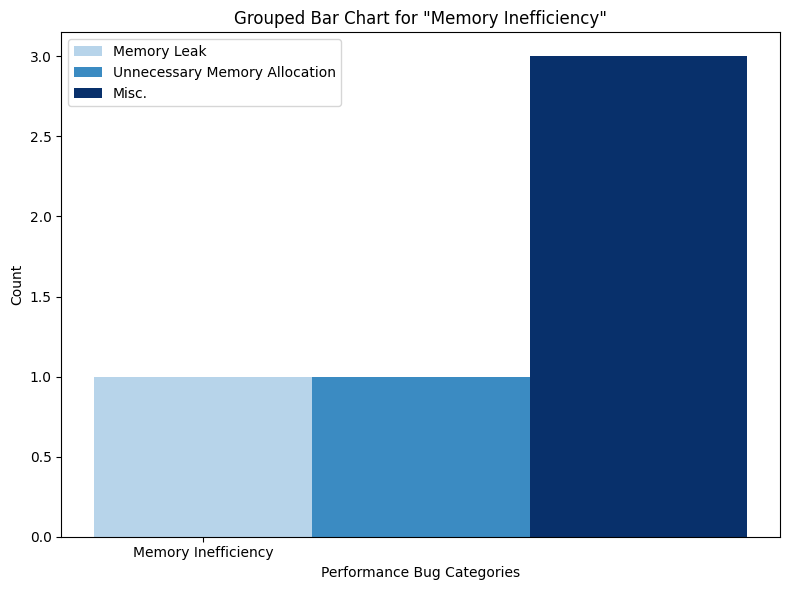

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Input data
performance_bugs_count = {
    "Memory Inefficiency": {
        "Memory Leak": 1,
        "Unnecessary Memory Allocation": 1,
        "Misc.": 3
    }
}

# Extract primary category and its subcategories with counts
primary_category = list(performance_bugs_count.keys())[0]
subcategories = list(performance_bugs_count[primary_category].keys())
counts = list(performance_bugs_count[primary_category].values())

# Set colors
colors = plt.cm.Blues(np.linspace(0.3, 1, len(subcategories)))

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate bar width
num_subcategories = len(subcategories)
bar_width = 0.8 / num_subcategories

# Plot bars for each subcategory
for i, (subcategory, count) in enumerate(zip(subcategories, counts)):
    # Adjust x position for each subcategory
    x_position = np.arange(1) + i * bar_width
    ax.bar(x_position, count, bar_width, color=colors[i], label=subcategory)

# Set labels and title
ax.set_xlabel('Performance Bug Categories')
ax.set_ylabel('Count')
ax.set_title(f'Grouped Bar Chart for "{primary_category}"')

# Set xticks
ax.set_xticks(np.arange(1))
ax.set_xticklabels([primary_category])

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


Memory Inefficiency
  Memory Leak: 1
  Unnecessary Memory Allocation: 1
  Misc.: 3
Poor Concurrency Control
  Thread Contention: 1
  Unnecessary locks: 0
  Unnecessary Thread Synchronization: 3
  Misc.: 2
Inefficient I/O
  Inefficient Disk I/O: 5
  Inefficient Caching: 1
  Unnecessary Logging: 1
  Misc.: 0
Network Bottlenecks
  Inefficient Data Transfer: 0
  Excessive Network Calls: 0
  Misc.: 1
Inefficient Algorithm/Data-structure
  Suboptimal Algorithm: 0
  Suboptimal Data Structures: 0
  Expensive Operation: 4
  Redundant Processing: 20
  Misc.: 1
Parallelization
  Missing Parallelism: 3
  Inefficient Parallelism: 0
  Misc.: 1
Micro-architectural
  Data Locality: 0
  Missed Compiler Optimization: 1
  Misc.: 0
Other
  Other: 0


In [80]:
!pip install openpyxl

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 24.7 MB/s eta 0:00:00


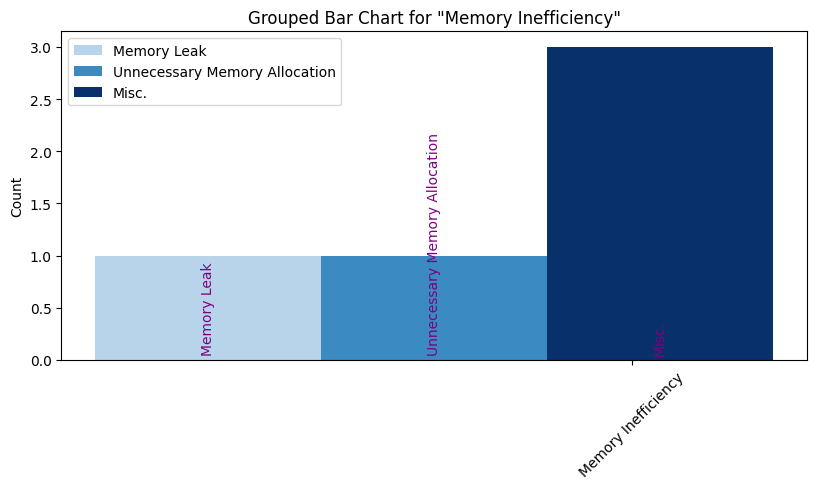

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Input data
performance_bugs_count = {
    "Memory Inefficiency": {
        "Memory Leak": 1,
        "Unnecessary Memory Allocation": 1,
        "Misc.": 3
    }
}

# Extract primary category and its subcategories with counts
primary_category = list(performance_bugs_count.keys())[0]
subcategories = list(performance_bugs_count[primary_category].keys())
counts = list(performance_bugs_count[primary_category].values())

# Set colors
colors = plt.cm.Blues(np.linspace(0.3, 1, len(subcategories)))

# Plotting
fig, ax = plt.subplots(figsize=(8.27, 5))  # A4 paper width = 210 mm, height adjusted to maintain aspect ratio

# Calculate bar width
num_subcategories = len(subcategories)
bar_width = 0.8 / num_subcategories

# Plot bars for each subcategory
for i, (subcategory, count) in enumerate(zip(subcategories, counts)):
    # Adjust x position for each subcategory
    x_position = np.arange(1) + i * bar_width
    ax.bar(x_position, count, bar_width, color=colors[i], label=subcategory)

    # Annotate subcategory names above the bars vertically with color
    ax.text(x_position, 0.05, subcategory, ha='center', va='bottom', rotation=90, color='purple')

# Set labels and title
ax.set_ylabel('Count')
ax.set_title(f'Grouped Bar Chart for "{primary_category}"')

# Set xticks and rotate x-axis labels
ax.set_xticks([0.5])
ax.set_xticklabels([primary_category], rotation=45)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Input data
performance_bugs_count = {
    "Memory Inefficiency": {
        "Memory Leak": 1,
        "Unnecessary Memory Allocation": 1,
        "Misc.": 3
    },
    "Poor Concurrency Control": {
        "Thread Contention": 1,
        "Unnecessary locks": 0,
        "Unnecessary Thread Synchronization": 3,
        "Misc.": 2
    },
    "Inefficient I/O": {
        "Inefficient Disk I/O": 5,
        "Inefficient Caching": 1,
        "Unnecessary Logging": 1,
        "Misc.": 0
    },
    "Network Bottlenecks": {
        "Inefficient Data Transfer": 0,
        "Excessive Network Calls": 0,
        "Misc.": 1
    },
    "Inefficient Algorithm/Data-structure": {
        "Suboptimal Algorithm": 0,
        "Suboptimal Data Structures": 0,
        "Expensive Operation": 4,
        "Redundant Processing": 20,
        "Misc.": 1
    },
    "Parallelization": {
        "Missing Parallelism": 3,
        "Inefficient Parallelism": 0,
        "Misc.": 1
    },
    "Micro-architectural": {
        "Data Locality": 0,
        "Missed Compiler Optimization": 1,
        "Misc.": 0
    },
    "Other": {
        "Other": 0
    }
}

# Set colors
colors = plt.cm.Blues(np.linspace(0.3, 1, 5))  # Adjust the number of subcategories as needed

# Plotting
fig, ax = plt.subplots(figsize=(100, 89))  # Adjust figure size as needed

# Calculate bar width
num_primary_categories = len(performance_bugs_count)
bar_width = 0.8 / num_primary_categories

# Loop over primary categories
for i, (primary_category, subcategory_counts) in enumerate(performance_bugs_count.items()):
    # Extract subcategories and their counts
    subcategories = list(subcategory_counts.keys())
    counts = list(subcategory_counts.values())
    
    # Plot bars for each subcategory
    for j, (subcategory, count) in enumerate(zip(subcategories, counts)):
        # Adjust x position for each subcategory within the primary category
        x_position = np.arange(num_primary_categories) + i * bar_width
        ax.bar(x_position[j], count, bar_width, color=colors[j], label=subcategory)
        
        # Annotate subcategory names above the bars vertically with color
        ax.text(x_position[j], count + 0.05, subcategory, ha='center', va='bottom', rotation=90, color='black')

# Set labels and title
ax.set_ylabel('Count')
ax.set_title('Grouped Bar Chart for Performance Bug Categories')
ax.set_xticks(np.arange(num_primary_categories))
ax.set_xticklabels(performance_bugs_count.keys(), rotation=45, ha='right')

# Add legend
ax.legend(title='Subcategories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/tmp/ipykernel_169835/409521440.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


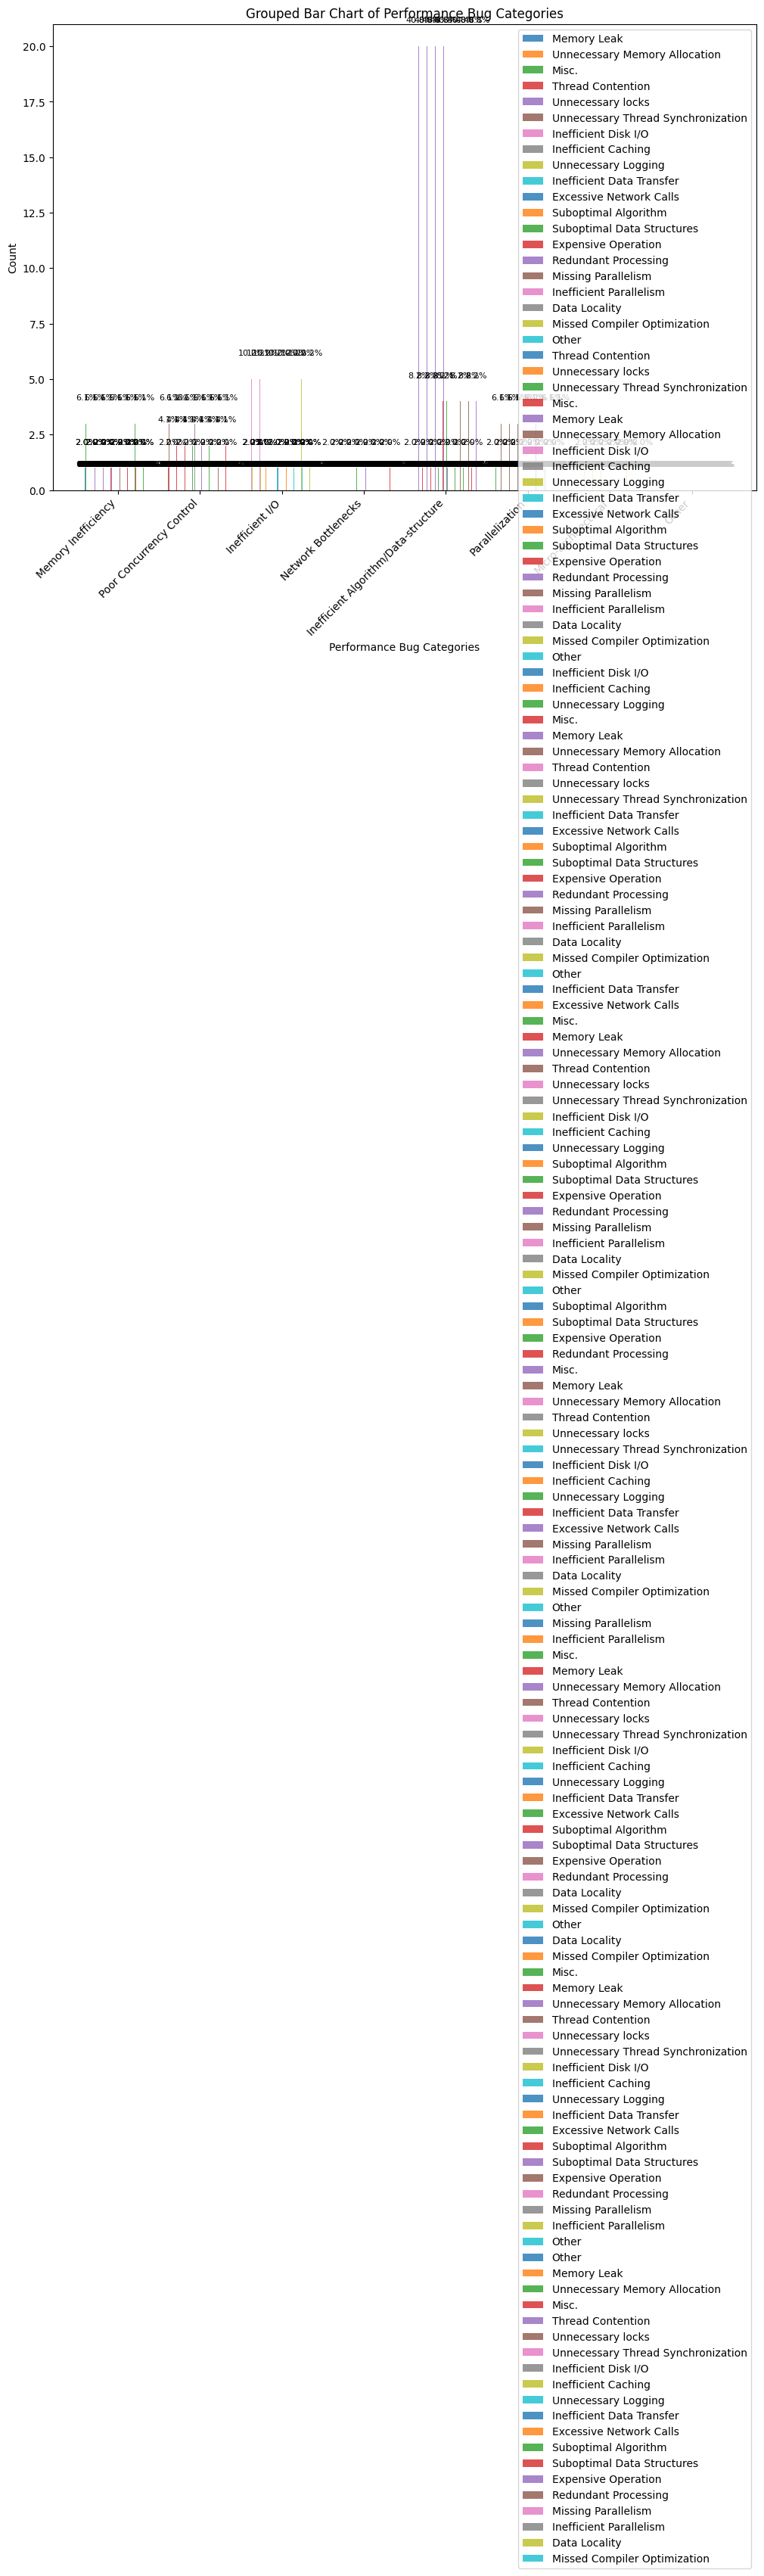

In [82]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_performance_bugs_count(performance_bugs_count):
    # Extract primary categories and their counts
    primary_categories = list(performance_bugs_count.keys())
    
    # Extract secondary categories and their counts
    secondary_categories = []
    secondary_counts = []
    for secondary in performance_bugs_count.values():
        secondary_categories.extend(list(secondary.keys()))
        secondary_counts.extend(list(secondary.values()))
    
    # Normalize counts for percentages
    total_count = sum(secondary_counts)
    secondary_percentages = [count / total_count * 100 for count in secondary_counts]
    
    # Set up the plot
    num_primary = len(primary_categories)
    num_secondary = len(secondary_categories)
    index = np.arange(num_primary)
    bar_width = 0.8 / num_secondary  # Adjust bar width for better spacing
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot bars for each secondary category within each primary category
    for i, secondary_category in enumerate(secondary_categories):
        secondary_values = np.array([performance_bugs_count[primary][secondary_category] for primary in primary_categories])
        proportions = secondary_values / total_count
        ax.bar(index + i * bar_width, secondary_values, bar_width, label=secondary_category, alpha=0.8)

        # Annotate each bar with percentage values
        for j, primary in enumerate(primary_categories):
            percentage = proportions[j] * 100
            ax.text(index[j] + (i + 0.5) * bar_width, secondary_values[j] + 1,
                    f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

    ax.set_xlabel('Performance Bug Categories')
    ax.set_ylabel('Count')
    ax.set_title('Grouped Bar Chart of Performance Bug Categories')
    ax.set_xticks(index + 0.4)
    ax.set_xticklabels(primary_categories, rotation=45, ha='right')
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Test the function with your performance_bugs_count dictionary
visualize_performance_bugs_count(performance_bugs_count)


In [63]:
# process model response
for index, pred in sampled_df['pred'].items():
    #print(type(pred))
    pattern = r'\[(.*?)\]'
    match = re.search(pattern, pred)
    if match:
        category_str = match.group(1)
        if "::" in category_str:
            parts = category_str.split("::")
            if len(parts) == 2:
                primary, secondary = parts
                primary = primary.strip()
                secondary = secondary.strip()
                #print(primary.strip(), secondary.strip())
            else:
                # Invalid format, only primary category is returned
                print("Iam here")
                print(parts[0].strip())
        else:
            print(category_str.strip())
    else:
        continue
    
    
    

memory_efficiency unnecessary_memory_allocation
Inefficient Algorithm/Data-structure Redundant Processing
Inefficient Algorithm/Data-structure Redundant Processing
Poor Concurrency Control Unnecessary Thread Synchronization
Poor Concurrency Control Eager Task Execution
Parallelization Missing Parallelism
Inefficient Algorithm/Data-structure Expensive Operation
Inefficient Algorithm/Data-structure Expensive Operation
Inefficient Algorithm/Data-structure Redundant Processing
Inefficient Algorithm/Data-structure Redundant Processing
Memory Efficiency Unnecessary Memory Allocation
Poor Concurrency Control Thread Contention
Inefficient Algorithm/Data-structure Redundant Processing
poor concurrency control unnecessary thread synchronization
Inefficient Algorithm/Data-structure Redundant Processing
parallelization inefficient parallelism
Inefficient Algorithm/Data-structure Redundant Processing
Inefficient I/O Inefficient Disk I/O
Parallelization Missing Parallelism
Inefficient I/O Unnecessar

In [49]:
import re

def extract_categories(commit_message):
    pattern = r'\[(.*?)\]'
    match = re.search(pattern, commit_message)
    categories = []
    if match:
        category_str = match.group(1)
        if "::" in category_str:
            parts = category_str.split("::")
            if len(parts) == 2:
                primary, secondary = parts
                categories.append((primary.strip(), secondary.strip()))
            else:
                # Invalid format, only primary category is returned
                categories.append(parts[0].strip())
        else:
            categories.append(category_str.strip())
    return categories




commit_message = """
[I/O]

Explanation:
The commit message suggests that the code is executing a long run of commands that never yield internally. This indicates that the threads are not yielding control to the event loop, leading to poor concurrency control. The unnecessary thread synchronization occurs when the code adds an unnecessary yield statement to the loop, which is not required for the code to function correctly but helps to improve the responsiveness
"""

categories = extract_categories(commit_message)
print(categories)



['I/O']


In [55]:
# Apply the function to all rows of the DataFrame
sampled_df['categories'] = sampled_df['pred'].apply(extract_categories)

In [57]:
from collections import defaultdict

def extract_categories_counters(df):
    primary_secondary_counter = defaultdict(int)
    primary_counter = defaultdict(int)
    
    for categories in df['categories']:
        for category in categories:
            if isinstance(category, tuple) and len(category) == 2:
                primary, secondary = category
                primary_secondary_counter[(primary, secondary)] += 1
            elif isinstance(category, str):
                primary_counter[category] += 1

    return primary_counter, primary_secondary_counter

# Example usage:
primary_counter, primary_secondary_counter = extract_categories_counters(sampled_df)

print("Primary Counts:")
for primary, count in primary_counter.items():
    print(f"{primary}: {count}")

print("\nPrimary-Secondary Counts:")
for primary_secondary, count in primary_secondary_counter.items():
    print(f"{primary_secondary}: {count}")


Primary Counts:

Primary-Secondary Counts:
('memory_efficiency', 'unnecessary_memory_allocation'): 1
('Inefficient Algorithm/Data-structure', 'Redundant Processing'): 20
('Poor Concurrency Control', 'Unnecessary Thread Synchronization'): 3
('Poor Concurrency Control', 'Eager Task Execution'): 1
('Parallelization', 'Missing Parallelism'): 2
('Inefficient Algorithm/Data-structure', 'Expensive Operation'): 4
('Memory Efficiency', 'Unnecessary Memory Allocation'): 1
('Poor Concurrency Control', 'Thread Contention'): 1
('poor concurrency control', 'unnecessary thread synchronization'): 1
('parallelization', 'inefficient parallelism'): 1
('Inefficient I/O', 'Inefficient Disk I/O'): 5
('Inefficient I/O', 'Unnecessary Logging'): 1
('Inefficient I/O', 'Inefficient Caching'): 1
('Memory Inefficiency', 'Below_Memory_Constraint'): 1
('Memory Inefficiency', 'Redundant Processing'): 1
('Micro-architectural', 'Missed Compiler Optimization'): 1
('network_bottlenecks', 'inefficient_data_transfer'): 1
(

In [56]:
print(type(sampled_df['categories']))

<class 'pandas.core.series.Series'>


In [51]:
# Example: Check values of 'categories' column for the first row (index 0)
print(sampled_df['categories'].iloc[0])

[('memory_efficiency', 'unnecessary_memory_allocation')]


Primary Counts:
[('memory_efficiency', 'unnecessary_memory_allocation'), "'file_buffer_size'"]: 1
[('Inefficient Algorithm/Data-structure', 'Redundant Processing')]: 20
[('Poor Concurrency Control', 'Unnecessary Thread Synchronization')]: 3
[('Poor Concurrency Control', 'Eager Task Execution')]: 1
[('Parallelization', 'Missing Parallelism')]: 2
[('Inefficient Algorithm/Data-structure', 'Expensive Operation')]: 4
[('Memory Efficiency', 'Unnecessary Memory Allocation')]: 1
[('Poor Concurrency Control', 'Thread Contention')]: 1
[('poor concurrency control', 'unnecessary thread synchronization')]: 1
[('parallelization', 'inefficient parallelism')]: 1
[('Inefficient I/O', 'Inefficient Disk I/O')]: 5
[('Inefficient I/O', 'Unnecessary Logging')]: 1
[('Inefficient I/O', 'Inefficient Caching')]: 1
[('Memory Inefficiency', 'Below_Memory_Constraint')]: 1
[('Memory Inefficiency', 'Redundant Processing')]: 1
[('Micro-architectural', 'Missed Compiler Optimization')]: 1
[('network_bottlenecks', 'inef

In [12]:
pred_f = pred
i = 0
for p in pred_f:
    print(str(i))
    print(p.strip())
    i += 1
#print(sampled_df['commit_message'][:2])

0
[Inefficient Algorithm/Data-structure::Unnecessary Data Conversion]

Explanation:
The commit message suggests that an optimization has been made to the unicode.encode() function for 'bytes' provided encodings. This implies that the original code was performing unnecessary data conversion between 'bytes' and 'unicode' data types. In the original code, the function checks if the provided encoding_node is of type 'bytes', and if so,
1
[Inefficient Algorithm/Data-structure::Redundant Processing]

Explanation:
The commit changes the code to download a larger model only when the model size is "large" instead of downloading the large model every time the model type is "FASTER_WHISPER". This optimization reduces the number of unnecessary downloads, making the code more efficient.
2
[Inefficient Algorithm/Data-structure::Redundant Processing]
3
[Inefficient Algorithm/Data-structure::Redundant Processing]

Explanation:
The commit modifies the code to only call the fix method for the rules that

In [9]:
# Initialize an empty list to store model responses
model_responses = []

# Iterate over each row in the DataFrame
torch.cuda.empty_cache()
for index, row in sampled_df.iterrows():
    commit_message = row['commit_message']
    formatted_prompt = prompt_template.format(prompt=commit_message)
    outputs = llm.generate([formatted_prompt], sampling_params)
    generated_text = outputs.output[0].text
    model_responses.append(generated_text)
    # Clearing the CUDA cache after processing each prompt
    torch.cuda.empty_cache()

# Add the model responses to the DataFrame
sampled_df['model_response'] = model_responses

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


AttributeError: 'list' object has no attribute 'output'

In [2]:

# quantized version

from vllm import LLM, SamplingParams

prompts =["the patch has improved performance"]
prompt_template='''<s>[INST] Evaluate the commit message provided. If the commit message explicitly indicates the implementation of performance optimization, answer 'Yes'. Otherwise, answer 'No'. The response should strictly be either 'Yes' or 'No' without any additional information or explanation. Do not consider commit messages that do not clearly relate to performance optimization.
Commit_message: {prompt} [/INST] 
Model Answer: </s>
'''

prompts = [prompt_template.format(prompt=prompt) for prompt in prompts]

sampling_params = SamplingParams(temperature=0.01, top_k=1, top_p=0.95,max_tokens=5)

llm = LLM(model="/home/ubuntu/Mistral-7B-Instruct-v0.2-AWQ/", quantization="awq", dtype="auto",tensor_parallel_size=1,gpu_memory_utilization=0.9, enforce_eager=True)

outputs = llm.generate(prompts, sampling_params)

# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Generated text: {generated_text}")


WARNING 05-03 19:01:19 config.py:169] awq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
INFO 05-03 19:01:19 llm_engine.py:98] Initializing an LLM engine (v0.4.1) with config: model='/home/ubuntu/Mistral-7B-Instruct-v0.2-AWQ/', speculative_config=None, tokenizer='/home/ubuntu/Mistral-7B-Instruct-v0.2-AWQ/', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=32768, download_dir=None, load_format=auto, tensor_parallel_size=1, disable_custom_all_reduce=False, quantization=awq, enforce_eager=True, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), seed=0)
INFO 05-03 19:01:20 model_runner.py:173] Loading model weights took 3.8735 GB
INFO 05-03 19:01:27 gpu_executor.py:119] # GPU blocks: 6096, # CPU blocks: 2048


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]

Generated text: Yes. 




In [4]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate
import os
# prompt_template = ''' <s> [INST] You are an analytical tool specialized in processing and classifying GitHub Commit message. Your task is to assess developer's intent in a given commit message and categorize it into one of the following predefined categories based on its content:
                      
#                       'Yes':  A commit messages that explicitly mentions performance improvement or optimization, specifically in terms of execution time or resource utilization. The message should clearly indicate actions that made the code runs faster or  more efficiently, use less memory, or more efficiently utilize system resources. Also, if a commit message describes a change made to address a performance bottleneck, prevent performance degradation, reduce overheads or solve a problem that negatively affects performance. This includes optimizations like replacing inefficient code patterns that are known to kill performance even if the message does not use the words 'improvement' or 'performance' explicitly.
#                       'No': A commit message that do not pertain to performance enhancements. This includes messages related to code changes for testing, documentation, performance profiling/monitoring/debugging/analysis and bug/error/crash fixes that don't explicitly mention performance improvement of the application itself, code refactoring or feature addition without explicit performance optimization,  and mentions of necessary or speculative or potential performance enhancements without concrete evidence or results. Also, a messages that is irrelevant, unclear, or ambiguous, and those that do not provide enough context to determine their intent.     

#                     If the commit message doesn't fit clearly into any of the above categories, classify it as: 'No'. Additionally, pay close attention to the context in which terms like 'optimize', 'performance', 'improve' or 'improvements' are used. Not all improvements are related to performance—only, classify a message as 'Yes' if it specifically mentions enhancements related to execution time, memory usage, or resource efficiency. Avoid making assumptions based on ambiguous terms. You should have high confidence in classifying a message as 'Yes' based on careful examination of the information provided in the commit message.
#                     If you encounter a commit message with multiple intentions, where at least one of those intentions includes a performance improvement, classify the entire message as 'Yes'.
#                     You will only respond with the predefined category. Do not include the word 'Category'. Do not provide explanations or notes.
                    
#                     Commit message : ```{commit_message}``` [/INST] Model_answer:  </s> '''

prompt_template = '''
You are provided with a GitHub commit in this format:
Commit Message: """the commit message written by the author"""
Original Code: """the code before the code modificaton"""
Modified Code: """the code after the code modification"""
Code Diff : """the diff between the original and the modified code"""

The commit is implementing a code optimization to improve software performance or resource utilization.
"
Your task is to meticulously examine the commit message, the original code, the modified code, and the differences between the original and modified code (code diff) to understand the improvements in terms of  performance or resource usage. Focus primarily on the changes made to the code as well as the commit message to grasp how they improve performance or resource usage. Your goal is to understand:"

1) The root cause of inefficiency in the original code that necessitated these optimizations.
2) Then categorize the inefficiency into one of the followwing categories:

Category A: Performance inefficiency
Category B: Resource inefficiency 


- Commit Message: 
{commit_message}

- Original Code:
```{Original_Code}```

- Modified Code:
```{Modified_Code}```

Code Diff:
```{Code_Diff}```

Model Response: '''



prompt = PromptTemplate(
    input_variables=["commit_message"], template=prompt_template
)
llm = LLMChain(llm=hf, prompt=prompt)

In [ ]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate
import os
prompt_template = ''' <s> [INST] You are an analytical tool specialized in processing and classifying GitHub Commit message. Your task is to assess developer's intent in a given commit message and categorize it into one of the following predefined categories based on its content:
                      
                      'Yes':  A commit messages that explicitly mentions performance improvement or optimization, specifically in terms of execution time or resource utilization. The message should clearly indicate actions that made the code runs faster or  more efficiently, use less memory, or more efficiently utilize system resources. Also, if a commit message describes a change made to address a performance bottleneck, prevent performance degradation, reduce overheads or solve a problem that negatively affects performance. This includes optimizations like replacing inefficient code patterns that are known to kill performance even if the message does not use the words 'improvement' or 'performance' explicitly.
                      'No': A commit message that do not pertain to performance enhancements. This includes messages related to code changes for testing, documentation, performance profiling/monitoring/debugging/analysis and bug/error/crash fixes that don't explicitly mention performance improvement of the application itself, code refactoring or feature addition without explicit performance optimization,  and mentions of necessary or speculative or potential performance enhancements without concrete evidence or results. Also, a messages that is irrelevant, unclear, or ambiguous, and those that do not provide enough context to determine their intent.     

                    If the commit message doesn't fit clearly into any of the above categories, classify it as: 'No'. Additionally, pay close attention to the context in which terms like 'optimize', 'performance', 'improve' or 'improvements' are used. Not all improvements are related to performance—only, classify a message as 'Yes' if it specifically mentions enhancements related to execution time, memory usage, or resource efficiency. Avoid making assumptions based on ambiguous terms. You should have high confidence in classifying a message as 'Yes' based on careful examination of the information provided in the commit message.
                    If you encounter a commit message with multiple intentions, where at least one of those intentions includes a performance improvement, classify the entire message as 'Yes'.
                    You will only respond with the predefined category. Do not include the word 'Category'. Do not provide explanations or notes.
                    
                    Commit message : ```{commit_message}``` [/INST] Model_answer:  </s> '''



prompt = PromptTemplate(
    input_variables=["commit_message"], template=prompt_template
)
llm = LLMChain(llm=hf, prompt=prompt)

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

# Specify the path to your JSON file
json_file_path = '/home/ubuntu/data/train.jsonl'
file_test = '/home/ubuntu/data/test.jsonl'
# Read the JSON file into a Pandas DataFrame
df_train = pd.read_json(json_file_path, lines = True)

df_test = pd.read_json(file_test,lines=True)
print(df_train)

In [ ]:


# Assuming df_train is already loaded and contains a target column named 'target'

# Define the range you're interested in
start_index = 1
end_index = 2180

# Filter df_train for the specified range before separating it based on the 'target' column
df_train_filtered = df_train.loc[start_index:end_index]

# Separate the filtered DataFrame into two based on the target column values
df_0 = df_train_filtered[df_train_filtered['target'] == 0]
df_1 = df_train_filtered[df_train_filtered['target'] == 1]

# Sample rows from each subset
# Note: Ensure there are at least 1000 rows in each filtered subset to avoid errors
min_count = min(len(df_0), len(df_1))
sample_0 = df_0.sample(n=min_count, random_state=42)
sample_1 = df_1.sample(n=min_count, random_state=42)

# Concatenate the two samples to get a balanced dataset
df_balanced_sample = pd.concat([sample_0, sample_1])

print(df_balanced_sample)




# # Assuming df_test is already loaded and contains a target column named 'target'

# # Separate the DataFrame into two based on the target column values
# df_0 = df_train[df_train['target'] == 0]
# df_1 = df_train[df_train['target'] == 1]

# # Calculate the minimum count to ensure equal number of 1s and 0s
# #min_count = min(len(df_0), len(df_1))

# # Sample min_count rows from each subset
# sample_0 = df_0.sample(n=1000, random_state=42)
# sample_1 = df_1.sample(n=1000, random_state=42)

# # Concatenate the two samples to get a balanced dataset
# df_balanced_sample = pd.concat([sample_0, sample_1])

# print(df_balanced_sample)


Now do predict with the llm

In [ ]:
Predictions=[]
for i in df_balanced_sample['commit_message']:
    Predictions.append(llm.run(i))

In [ ]:
import re
df_balanced_sample['mistral_result']=Predictions
df_balanced_sample['mistral_result_cleaned']=df_balanced_sample['mistral_result'].apply(lambda x: re.search(r'\b(Yes|No)\b', x).group(0) if re.search(r'\b(Yes|No)\b', x) else None)

In [ ]:
print(df_balanced_sample)

In [ ]:
df_balanced_sample['mistral_result_cleaned'].unique()

In [ ]:
df_balanced_sample['mistral_target']=df_balanced_sample['mistral_result_cleaned'].replace('Yes',1).replace('No',0)

In [ ]:
df_balanced_sample['mistral_target']

In [ ]:
df_balanced_sample['mistral_target'].value_counts()

In [ ]:
df_balanced_sample['mistral_target']=df_balanced_sample['mistral_target'].fillna(0)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import classification_report

#y_true= df_balanced_sample['target']
#y_pred=df_balanced_sample['mistral_target']
y_true= df_balanced_sample[df_balanced_sample['mistral_target'].notnull()]['target']
y_pred=df_balanced_sample[df_balanced_sample['mistral_target'].notnull()]['mistral_target']

# Generate the classification report
report = classification_report(y_true, y_pred,output_dict=True)

# Print the classification report
print(report)


In [ ]:
y_true.value_counts()


In [ ]:
y_pred.value_counts()

In [ ]:
!pip install seaborn

In [ ]:
!pip install matplotlib

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.DataFrame(report).transpose()
df1 = df1.sort_values(by=['f1-score'], ascending=False)

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df1[['precision', 'recall', 'f1-score']], annot=True, cmap='plasma')
plt.title('Classification Report')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Extract true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN)
tn, fp, fn, tp = cm.ravel()

# Calculate false positives and false negatives
false_positive = fp
false_negative = fn

print("False Positives:", false_positive)
print("False Negatives:", false_negative)
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming y_true and y_pred are already defined as shown previously
import numpy as np
unique_labels = np.unique(np.concatenate((y_true, y_pred)))

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=unique_labels)

# Plot the confusion matrix as a heatmap with unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=unique_labels, 
            yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We need to know the false positives and false negetives for tuning the model

In [ ]:
pos = df_balanced_sample[ df_balanced_sample['mistral_target'] == 1]
pos

In [ ]:
fp = pos[pos['target'] == 0]
fp.to_csv('false_positive.csv', index=False)

In [ ]:
pos = df_balanced_sample[ df_balanced_sample['mistral_target'] == 0]  #for false negetives
pos

In [ ]:
fn = pos[pos['target'] == 1]
fn.to_csv('false_negetive.csv', index=False)

In [ ]:
# from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
# import torch
# # Specify the device for CUDA acceleration
# device = "cuda" # Or "cpu" if you're not using NVIDIA GPUs
# # Configuration for BitsAndBytes to optimize model loading
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True, # Enables loading the model in 4-bit precision
#     bnb_4bit_quant_type="nf4", # Specifies the quantization type
#     bnb_4bit_use_double_quant=True, # Enables double quantization for better precision
# )
# # Loading the tokenizer
# tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
# # Loading the model with BitsAndBytes configuration, and additional settings from Method-1
# model = AutoModelForCausalLM.from_pretrained(
#     "mistralai/Mistral-7B-Instruct-v0.2",
#     torch_dtype=torch.float16, # Sets the tensor type to float16 for faster computation
#     device_map="auto", # Automatically maps the model layers to the available devices
#     trust_remote_code=True, # Allows the execution of remote code for custom model configurations
#     attn_implementation="flash_attention_2", # Uses a specific attention implementation optimized for performance
#     _config=bnb_config, # Applies the BitsAndBytes configuration
# )
# # Move the model to the specified device
# model.to(device)
# # Prepare the messages for encoding
# messages = [
#     {"role": "user", "content": "What is your favourite condiment?"},
#     {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
#     {"role": "user", "content": "Do you have mayonnaise recipes?"}
# ]
# # Encode the messages using the tokenizer
# encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt").to(device)
# # Generate responses using the model
# generated_ids = model.generate(encodeds, max_new_tokens=5, do_sample=True)
# decoded = tokenizer.batch_decode(generated_ids)
# # Print the generated response
# print(decoded[0])